Observations:
    1. In urban cities, there were more ride times, but the average fares were low. It's contrary in rural cities.  
    2. The more people take tides (higher ride number), the lower average fares are. 
    3. There are more drivers in urban cities, because there are more demands.

Note:
    1. There was one city with duplicated data (James Port). Without additional information, I treated it as a duplicated data, and combilined two numbers.
    2. I used Seaborn and Matplotlib to create bubble charts.
    3. I experimented different colormaps to create pie charts.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import colors as mcolors

In [2]:
# Load in csv
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

#city_df["city"].value_counts()

In [3]:
clean_city_df=city_df
clean_city_df.index=city_df["city"]
clean_city_df.loc[clean_city_df.index=="Port James","driver_count"]=clean_city_df[clean_city_df.index=="Port James"]["driver_count"].sum()
clean_city_df[clean_city_df.index=="Port James"]
clean_city_df=city_df.drop_duplicates(keep='first')
clean_city_df[clean_city_df.index=="Port James"]

,city,driver_count,type
city,,,
Port James,Port James,18,Suburban


In [4]:
#ride_df.head()

In [5]:
grouped_ride=pd.groupby(ride_df,["city"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [6]:
#* Average Fare ($) Per City
average_fare=grouped_ride.aggregate({"fare":"mean"})
average_fare.head()


,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [7]:
clean_city_df["total ride"]=grouped_ride["ride_id"].count()
clean_city_df["average fare"]=average_fare

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# Experiment differnt ways to apply colors
# clean_city_df.loc[clean_city_df.type=="Rural","color"]="gold1"
# clean_city_df.loc[clean_city_df.type=="Urban","color"]="lightskyblue"
# clean_city_df.loc[clean_city_df.type=="Suburban","color"]="lightcoral"

clean_city_df["color"]=clean_city_df.type.map({"Rural":"#FFD700","Urban":"#87CEFA","Suburban":"#F08080"})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
clean_city_df.head()

,city,driver_count,type,total ride,average fare,color
city,,,,,,
Kelseyland,Kelseyland,63,Urban,28,21.806429,#87CEFA
Nguyenbury,Nguyenbury,8,Urban,26,25.899615,#87CEFA
East Douglas,East Douglas,12,Urban,22,26.169091,#87CEFA
West Dawnfurt,West Dawnfurt,34,Urban,29,22.330345,#87CEFA
Rodriguezburgh,Rodriguezburgh,52,Urban,23,21.332609,#87CEFA


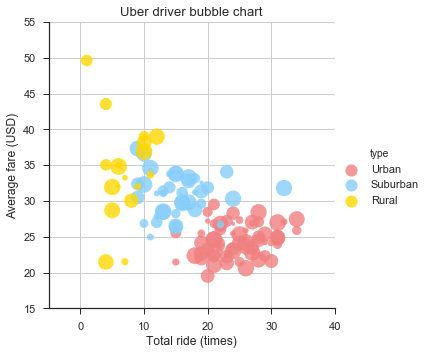

In [10]:
# Use Seaborn to create bubble chart

bubble_size=clean_city_df["driver_count"]*4
palette={"Rural":"#FFD700","Suburban":"#87CEFA","Urban":"#F08080"}

# Set style of scatterplot
sns.set_context("notebook",font_scale=1.1)
sns.set_style("ticks")

#Create scatterplot of dataframe
sns.lmplot("total ride","average fare",clean_city_df,hue="type",fit_reg=False,palette=palette,scatter_kws={"s":bubble_size})
plt.title("Uber driver bubble chart")
plt.xlabel("Total ride (times)")
plt.ylabel("Average fare (USD)")
plt.grid()
plt.ylim((15,55))
plt.xlim((-5,40))
plt.savefig("bubblechart.png")


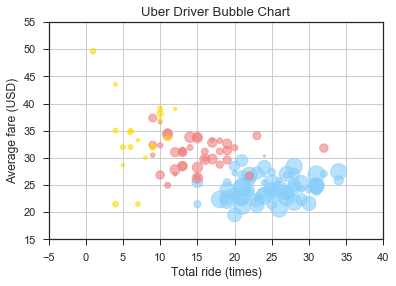

In [11]:
#Use Matplotlib to create bubble chart (Need help to add legend)

bubble2=plt.scatter(clean_city_df["total ride"], clean_city_df["average fare"], s=bubble_size,alpha=0.6,linewidth=1)
bubble2.set_facecolor(c=clean_city_df["color"])
plt.title("Uber Driver Bubble Chart")
plt.xlabel("Total ride (times)")
plt.ylabel("Average fare (USD)")
plt.grid()
plt.ylim((15,55))
plt.xlim((-5,40))
plt.savefig("bubblechart2.png")



In [12]:
clean_city_df["total fare"]=clean_city_df["average fare"]*clean_city_df["total ride"]
clean_city_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,city,driver_count,type,total ride,average fare,color,total fare
city,,,,,,,
Kelseyland,Kelseyland,63,Urban,28,21.806429,#87CEFA,610.58
Nguyenbury,Nguyenbury,8,Urban,26,25.899615,#87CEFA,673.39
East Douglas,East Douglas,12,Urban,22,26.169091,#87CEFA,575.72
West Dawnfurt,West Dawnfurt,34,Urban,29,22.330345,#87CEFA,647.58
Rodriguezburgh,Rodriguezburgh,52,Urban,23,21.332609,#87CEFA,490.65


In [21]:
grouped_type=pd.DataFrame.groupby(clean_city_df,"type").aggregate({"total ride":"sum","driver_count":"sum","total fare":"sum"})
grouped_type

,total ride,driver_count,total fare
type,,,
Rural,125,104,4255.09
Suburban,625,638,19317.88
Urban,1625,2607,40078.34


Text(0.5,1,'Total Ride Pie Chart per Type')

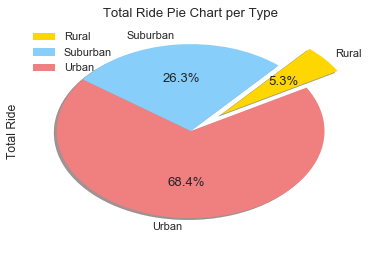

In [36]:

colors=["#FFD700","#87CEFA","#F08080"]

pie1=grouped_type.plot.pie("total ride",colors=colors,autopct="%1.1f%%",shadow=True,startangle=30,explode=(0.3,0,0))

pie1.set_ylabel("Total Ride")
pie1.set_title("Total Ride Pie Chart per Type")


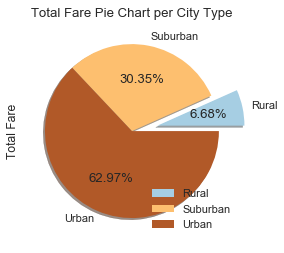

In [38]:
pie2=grouped_type.plot.pie("total fare",explode=(0.3,0,0),colormap="Paired",autopct="%1.2f%%",shadow=True)
pie2.set_ylabel("Total Fare")
pie2.set_title("Total Fare Pie Chart per City Type")
pie2.legend(loc="lower right")
pie2.set_aspect("equal")


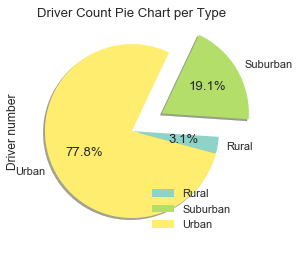

In [39]:
pie3=grouped_type.plot.pie("driver_count",explode=(0,0.4,0),colormap="Set3",autopct="%1.1f%%",startangle=-15,shadow=True)
pie3.set_ylabel("Driver number")
pie3.set_title("Driver Count Pie Chart per Type")
pie3.legend(loc="lower right")
pie3.set_aspect("equal")